In [1]:
## This notebook will take the sgRNA mapped NGS counts table from the starting distribution of the library and the library post-passaging
## and create kernel density plots of those distributions

## Plots generated in this notebook are used to make Figures S1E&F

In [3]:
## Import packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Import data

## Data can be found at: https://app.box.com/folder/171917844113?s=nuwov4kgb55mqfrr7j5a216ot78f4uxn
## Import the pre-transduction GI library counts 
#counts_table = pd.read_excel('../geneticinteractionscreen_files/GI_library_pretransduction_counts.xlsx',index_col = 0)
counts_table = pd.read_excel('/Users/benh/Desktop/UCSF_Tetrad_Program/Gilbert_Lab/DDRmap/Cloning/doublesCounts.xlsx',
                            index_col = 0)

## Import the counts in each passaged population from the first GI experiment
#counts_map = pd.read_csv('../geneticinteractionscreen_files/GI_expt1_counts.txt',sep='\t',index_col = 0)
counts_map = pd.read_csv('/Users/benh/Desktop/UCSF_Tetrad_Program/Gilbert_Lab/DDRmap/ddrGI_K562_results/Counts_Files_Processed/ddrGI_K562_CountsMaster.txt',
                       sep = '\t',
                       index_col=0)


In [5]:
## Log10 transform counts data

counts_table['log10'] = np.log10(counts_table['Reads'])

In [6]:
## pseudocount each cell in the counts_map
counts_map += 1

In [7]:
## calculate 90% confidence intervals for each population
fold_variation = (np.percentile(counts_table['Reads'],95)/np.percentile(counts_table['Reads'],5))
log_fold_variation = (np.percentile(counts_table['log10'],95)/np.percentile(counts_table['log10'],5))




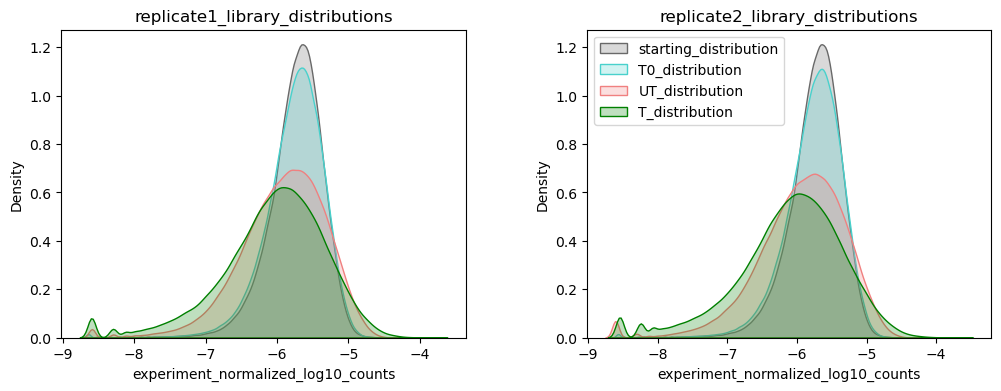

In [9]:
## Here I'm going to plot the number of reads for each guide normalized by the total number of reads for each of the
## starting library and the GI map samples

## First generate normalized matrices
counts_map_norm = counts_map
for col in counts_map_norm:
    counts_map_norm[col] = counts_map_norm[col]/counts_map_norm[col].sum()

counts_table_norm = counts_table
counts_table_norm['Reads'] = counts_table_norm['Reads']/counts_table_norm['Reads'].sum()


## Now generate kde plots. Two figures, one for each replicate
plt.figure(figsize=(12,4))
numPlots = matplotlib.gridspec.GridSpec(1,2,wspace=0.3)

plt.subplot(numPlots[0])
sns.kdeplot(np.log10(counts_table_norm['Reads']),color = 'dimgray', fill=True,label = 'starting_distribution')
sns.kdeplot(np.log10(counts_map_norm['Rep1_T0']),color = 'mediumturquoise', fill=True,label = 'T0_distribution')
sns.kdeplot(np.log10(counts_map_norm['Rep1_UT']),color = 'lightcoral', fill=True,label = 'UT_distribution')
sns.kdeplot(np.log10(counts_map_norm['Rep1_DRUG']),color = 'green', fill=True,label = 'T_distribution')

plt.xlabel('experiment_normalized_log10_counts')
plt.title('replicate1_library_distributions')
#plt.legend(loc='upper left')

plt.subplot(numPlots[1])
sns.kdeplot(np.log10(counts_table_norm['Reads']),color = 'dimgray', fill=True,label = 'starting_distribution')
sns.kdeplot(np.log10(counts_map_norm['Rep2_T0']),color = 'mediumturquoise', fill=True,label = 'T0_distribution')
sns.kdeplot(np.log10(counts_map_norm['Rep2_UT']),color = 'lightcoral', fill=True,label = 'UT_distribution')
sns.kdeplot(np.log10(counts_map_norm['Rep2_DRUG']),color = 'green', fill=True,label = 'T_distribution')
plt.xlabel('experiment_normalized_log10_counts')
plt.title('replicate2_library_distributions')
plt.legend(loc='upper left')

#plt.savefig('/Users/benh/Desktop/library_depletion_plot.png',dpi=300)

In [85]:
counts_map_norm

,Rep1_T0,Rep1_UT,Rep1_DRUG,Rep2_T0,Rep2_UT,Rep2_DRUG
double,,,,,,
ATR_+_142297571.23-P1P2:ATR_+_142297571.23-P1P2,1.242662e-06,1.874575e-07,2.800765e-08,1.055939e-06,7.927591e-08,2.851507e-09
ATR_+_142297571.23-P1P2:ATR_-_142297369.23-P1P2,2.515129e-06,1.463709e-07,2.546150e-09,1.716577e-06,2.997620e-07,5.703013e-09
ATR_+_142297571.23-P1P2:BRCA1_+_41277361.23-P1P2,1.256418e-06,4.005941e-07,1.782305e-08,1.353768e-06,2.155314e-07,8.554520e-09
ATR_+_142297571.23-P1P2:BRCA1_-_41277328.23-P1P2,2.691669e-06,5.341254e-07,1.756844e-07,2.239132e-06,3.592189e-07,1.425753e-08
ATR_+_142297571.23-P1P2:FANCD2_-_10068143.23-P1P2,1.941946e-06,2.413836e-07,2.546150e-09,1.897982e-06,1.882803e-07,2.708931e-07
...,...,...,...,...,...,...
non-targeting_01297:non-targeting_01723,1.854822e-06,4.437350e-06,2.828773e-06,1.675964e-06,4.528636e-06,1.662428e-06
non-targeting_01297:non-targeting_00067,1.980922e-06,4.681301e-06,2.719288e-06,1.916935e-06,4.429541e-06,2.312572e-06
non-targeting_01297:non-targeting_00219,2.865917e-07,5.598046e-07,6.110760e-07,3.763474e-07,8.546934e-07,6.415890e-07
